In [190]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

In [191]:
input_dir='E:\python大数据\class11data.csv'
data = pd.read_csv(input_dir);
data.head()

,Unnamed: 0,位置信息,区域,总价,单价,房型,面积,朝向,类型,楼层,建成时间,结构,关注人数,发布时间
0,1,西蜀御景二期,崇州,77.0,5983.0,3室2厅,128.70,东南,毛坯,中楼层(共18层),2012,塔楼,15,一年前发布
1,23,嘉裕第六洲龙泽台,崇州,155.0,9592.0,3室2厅,161.60,东南,毛坯,高楼层(共9层),2019,板楼,2,2个月以前发布
2,25,嘉裕第六洲龙泽台,崇州,160.0,9932.0,4室2厅,161.11,南,毛坯,高楼层(共9层),2018,板楼,2,1个月以前发布
3,26,嘉裕第六洲龙泽台,崇州,100.0,7992.0,3室2厅,125.13,南,毛坯,中楼层(共9层),2018,板楼,2,1个月以前发布
4,28,嘉裕第六洲龙泽台,崇州,108.0,8522.0,3室2厅,126.74,南,简装,中楼层(共6层),2018,板楼,1,1个月以前发布


In [192]:
data = data.drop(['Unnamed: 0','位置信息','关注人数'],axis = 1)


In [193]:
data = data.drop('发布时间',axis = 1)


In [194]:
data = data.drop(data[data.楼层 == ' 30层 '].index)

In [195]:
data.区域.unique()


array(['崇州', '成华'], dtype=object)

In [196]:
data = data.join(pd.get_dummies(data.区域))
data=data.drop('区域',axis=1)

In [197]:
data = data.join(pd.get_dummies(data.房型))
data=data.drop('房型',axis=1)

In [198]:
data = data.join(pd.get_dummies(data.类型))
data=data.drop('类型',axis=1)


In [199]:
data = data.join(pd.get_dummies(data.结构))
data=data.drop('结构',axis=1)

In [200]:
data.head()

,总价,单价,面积,朝向,楼层,建成时间,崇州,成华,1室0厅,1室1厅,...,6室2厅,6室3厅,其他,毛坯,简装,精装,塔楼,平房,板塔结合,板楼
0,77.0,5983.0,128.70,东南,中楼层(共18层),2012,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,155.0,9592.0,161.60,东南,高楼层(共9层),2019,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,160.0,9932.0,161.11,南,高楼层(共9层),2018,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,100.0,7992.0,125.13,南,中楼层(共9层),2018,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,108.0,8522.0,126.74,南,中楼层(共6层),2018,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [201]:
data.loc[:,'floor']=data.楼层.map(lambda x:x.split('(')[0])

In [202]:
data=data.join(pd.get_dummies(data['floor']))
data=data.drop('floor',axis=1)
data.head()

,总价,单价,面积,朝向,楼层,建成时间,崇州,成华,1室0厅,1室1厅,...,毛坯,简装,精装,塔楼,平房,板塔结合,板楼,中楼层,低楼层,高楼层
0,77.0,5983.0,128.70,东南,中楼层(共18层),2012,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,155.0,9592.0,161.60,东南,高楼层(共9层),2019,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,160.0,9932.0,161.11,南,高楼层(共9层),2018,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,100.0,7992.0,125.13,南,中楼层(共9层),2018,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,108.0,8522.0,126.74,南,中楼层(共6层),2018,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [203]:

data = data.join(pd.get_dummies(['总楼层']))
data.head()

,总价,单价,面积,朝向,楼层,建成时间,崇州,成华,1室0厅,1室1厅,...,简装,精装,塔楼,平房,板塔结合,板楼,中楼层,低楼层,高楼层,总楼层
0,77.0,5983.0,128.70,东南,中楼层(共18层),2012,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1.0
1,155.0,9592.0,161.60,东南,高楼层(共9层),2019,1,0,0,0,...,0,0,0,0,0,1,0,0,1,NaN
2,160.0,9932.0,161.11,南,高楼层(共9层),2018,1,0,0,0,...,0,0,0,0,0,1,0,0,1,NaN
3,100.0,7992.0,125.13,南,中楼层(共9层),2018,1,0,0,0,...,0,0,0,0,0,1,1,0,0,NaN
4,108.0,8522.0,126.74,南,中楼层(共6层),2018,1,0,0,0,...,1,0,0,0,0,1,1,0,0,NaN


In [204]:
data.总楼层=data.楼层.map(lambda x:re.findall(r"\d+\.?\d*",x)[0] )
data=data.drop('楼层',axis=1)
data

,总价,单价,面积,朝向,建成时间,崇州,成华,1室0厅,1室1厅,1室2厅,...,简装,精装,塔楼,平房,板塔结合,板楼,中楼层,低楼层,高楼层,总楼层
0,77.0,5983.0,128.70,东南,2012,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,18
1,155.0,9592.0,161.60,东南,2019,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,9
2,160.0,9932.0,161.11,南,2018,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,9
3,100.0,7992.0,125.13,南,2018,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,9
4,108.0,8522.0,126.74,南,2018,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,180.0,22247.0,80.91,东,2009,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,18
2770,90.0,16240.0,55.42,南,1991,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,7
2771,140.0,14943.0,93.69,西北,2007,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,22
2772,82.0,18544.0,44.22,东,2008,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,32


In [205]:
array1=np.zeros((len(data),8),dtype=np.int32)

In [206]:
df=pd.DataFrame(array1,columns=['东', '南', '西', '北', '东北', '东南', '西南', '西北'])

In [207]:
def get_dummies_dir(house_dir):
    for i in range(len(house_dir)):
        a = house_dir[i].split(' ')
        for j in a:
            df.loc[i,str(j)] = 1

In [208]:
data=data.reset_index()
data=data.drop('index',axis=1)

#data=data.drop()

In [209]:
get_dummies_dir(data.朝向)
df = df.drop('',axis = 1)
data = data.join(df)
data = data.drop('朝向',axis = 1)
data.head()

,总价,单价,面积,建成时间,崇州,成华,1室0厅,1室1厅,1室2厅,2室0厅,...,高楼层,总楼层,东,南,西,北,东北,东南,西南,西北
0,77.0,5983.0,128.70,2012,1,0,0,0,0,0,...,0,18,0,0,0,0,0,1,0,0
1,155.0,9592.0,161.60,2019,1,0,0,0,0,0,...,1,9,0,0,0,0,0,1,0,0
2,160.0,9932.0,161.11,2018,1,0,0,0,0,0,...,1,9,0,1,0,0,0,0,0,0
3,100.0,7992.0,125.13,2018,1,0,0,0,0,0,...,0,9,0,1,0,0,0,0,0,0
4,108.0,8522.0,126.74,2018,1,0,0,0,0,0,...,0,6,0,1,0,0,0,0,0,0


In [210]:
y=data.单价

In [211]:
data.columns

Index(['总价', '单价', '面积', '建成时间', '崇州', '成华', '1室0厅 ', '1室1厅 ', '1室2厅 ',
       '2室0厅 ', '2室1厅 ', '2室2厅 ', '3室0厅 ', '3室1厅 ', '3室2厅 ', '4室1厅 ', '4室2厅 ',
       '4室3厅 ', '4室4厅 ', '5室1厅 ', '5室2厅 ', '5室3厅 ', '6室2厅 ', '6室3厅 ', ' 其他 ',
       ' 毛坯 ', ' 简装 ', ' 精装 ', ' 塔楼', ' 平房', ' 板塔结合', ' 板楼', ' 中楼层', ' 低楼层',
       ' 高楼层', '总楼层', '东', '南', '西', '北', '东北', '东南', '西南', '西北'],
      dtype='object')

In [212]:
x=data[['面积','崇州', '成华', '1室0厅 ', '1室1厅 ', '1室2厅 ',
       '2室0厅 ', '2室1厅 ', '2室2厅 ', '3室0厅 ', '3室1厅 ', '3室2厅 ', '4室1厅 ', '4室2厅 ',
       '4室3厅 ', '4室4厅 ', '5室1厅 ', '5室2厅 ', '5室3厅 ', '6室2厅 ', '6室3厅 ', ' 塔楼', ' 平房', ' 中楼层', ' 低楼层',
       ' 高楼层', '总楼层','东', '南', '西', '北', '东北', '东南', '西南', '西北']]

In [213]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)


In [214]:
reg=LR().fit(xtrain,ytrain)

In [215]:
ypre=reg.predict(xtest)

In [216]:
ypre=pd.DataFrame(ypre,columns=['单价'])

# ypre=ypre.sort_values(by='单价')
# ypre=ypre.reset_index()
# ypre=ypre.drop('index',axis=1)
# ypre

In [217]:
# ytest=ytest.sort_values()
# ytest=ytest.reset_index()
# ytest=ytest.drop('index',axis=1)

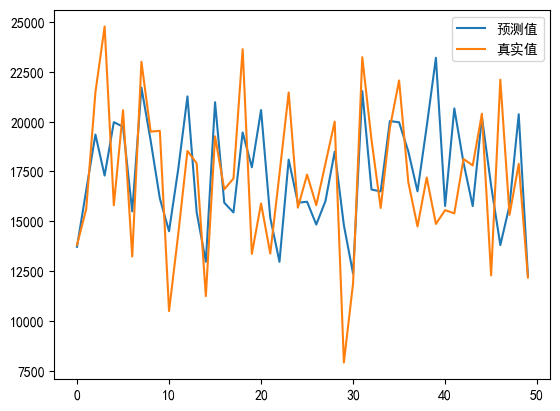

In [218]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.plot(range(len(ypre))[:50],ypre[:50],label='预测值')
plt.plot(range(len(ytest))[:50],ytest[:50],label='真实值')
plt.legend()

In [219]:
r2=r2_score(ytest,ypre)
print(r2)

0.4507180648107775
